# Tasks for laboratory assignment 3

In [4]:
# imports section

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.preprocessing import PolynomialFeatures


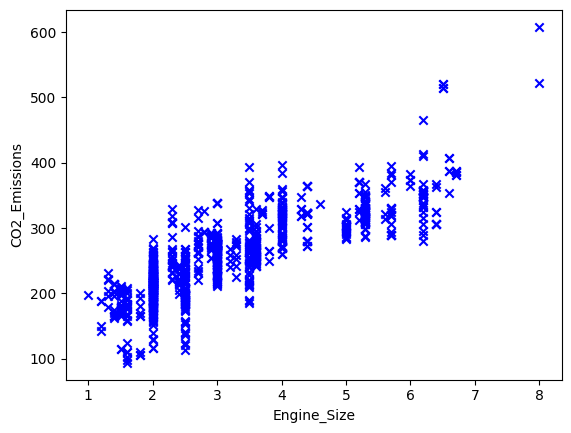

In [ ]:
def build_plot(file_path, x, y):
    data = pd.read_csv(file_path)
    plt.scatter(data[x], data[y], c='blue', marker='x')
    plt.xlabel(x)
    plt.ylabel(y)
    return plt

build_plot('resources/CO2_emission.csv', 'Engine_Size', 'CO2_Emissions').show()


In [5]:
import pandas as pd

def extract_texts_from_file(file_path):
    # Read the CSV file using pandas
    df = pd.read_csv(file_path)
    
    # Convert each row to a string and collect in a list
    text_data = df.astype(str).agg(','.join, axis=1).tolist()
    
    return text_data

# Example usage
data = extract_texts_from_file('resources/heart.csv')
print(data[:50])


['63,1,3,145,233,1,0,150,0,2.3,0,0,1,1', '37,1,2,130,250,0,1,187,0,3.5,0,0,2,1', '41,0,1,130,204,0,0,172,0,1.4,2,0,2,1', '56,1,1,120,236,0,1,178,0,0.8,2,0,2,1', '57,0,0,120,354,0,1,163,1,0.6,2,0,2,1', '57,1,0,140,192,0,1,148,0,0.4,1,0,1,1', '56,0,1,140,294,0,0,153,0,1.3,1,0,2,1', '44,1,1,120,263,0,1,173,0,0.0,2,0,3,1', '52,1,2,172,199,1,1,162,0,0.5,2,0,3,1', '57,1,2,150,168,0,1,174,0,1.6,2,0,2,1', '54,1,0,140,239,0,1,160,0,1.2,2,0,2,1', '48,0,2,130,275,0,1,139,0,0.2,2,0,2,1', '49,1,1,130,266,0,1,171,0,0.6,2,0,2,1', '64,1,3,110,211,0,0,144,1,1.8,1,0,2,1', '58,0,3,150,283,1,0,162,0,1.0,2,0,2,1', '50,0,2,120,219,0,1,158,0,1.6,1,0,2,1', '58,0,2,120,340,0,1,172,0,0.0,2,0,2,1', '66,0,3,150,226,0,1,114,0,2.6,0,0,2,1', '43,1,0,150,247,0,1,171,0,1.5,2,0,2,1', '69,0,3,140,239,0,1,151,0,1.8,2,2,2,1', '59,1,0,135,234,0,1,161,0,0.5,1,0,3,1', '44,1,2,130,233,0,1,179,1,0.4,2,0,2,1', '42,1,0,140,226,0,1,178,0,0.0,2,0,2,1', '61,1,2,150,243,1,1,137,1,1.0,1,0,2,1', '40,1,3,140,199,0,1,178,1,1.4,2,0,3,1',

## CO2 emissions

Process file `CO2_emission.csv`. Build a model, that would predict CO2 emissions from the size of the engine of car. Visualize model on a plot.

Choose regression model that would best fit the data. Choose the library for model implementation (sklearn, other library, custom implementation).

Columns: Index(['Model_Year', 'Make', 'Model', 'Vehicle_Class', 'Engine_Size',
       'Cylinders', 'Transmission', 'Fuel_Consumption_in_City(L/100 km)',
       'Fuel_Consumption_in_City_Hwy(L/100 km)',
       'Fuel_Consumption_comb(L/100km)', 'CO2_Emissions', 'Smog_Level'],
      dtype='object')


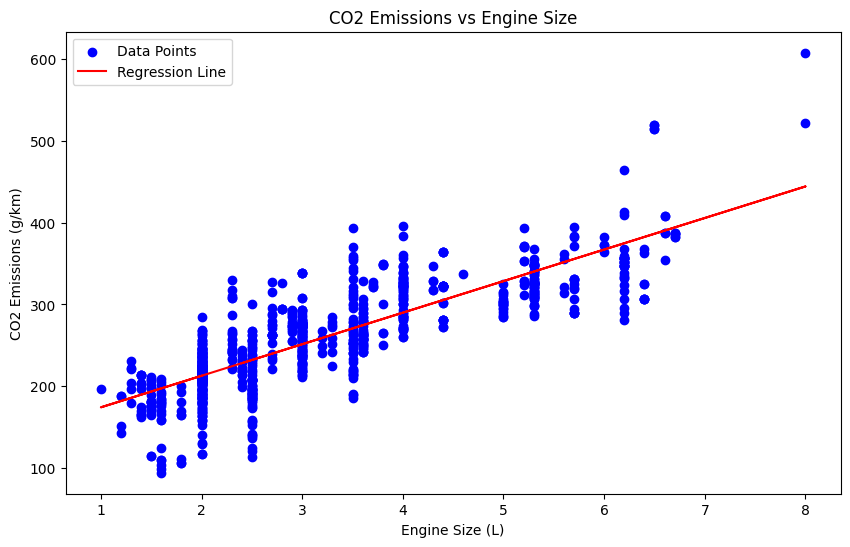

Model parameters (theta): Intercept = 259.5609840338501, Coefficient = 53.5912135029706


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def extract_texts_from_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    return lines

def CO2_emissions(data):
    # Convert the list of rows into a pandas DataFrame
    data = [line.strip().split(',') for line in data]  # Split each line into a list
    df = pd.DataFrame(data[1:], columns=data[0])  # Use the first row as column headers

    # Debugging: Print column names to ensure they are loaded correctly
    print(f"Columns: {df.columns}")

    # Check if 'Engine_Size' and 'CO2_Emissions' exist in the DataFrame columns
    if 'Engine_Size' not in df.columns or 'CO2_Emissions' not in df.columns:
        raise KeyError("Required columns not found in the CSV file")

    # Extract the relevant columns (Engine_Size and CO2_Emissions)
    df = df[['Engine_Size', 'CO2_Emissions']].dropna()  # Drop any missing values

    # Convert the columns to appropriate types
    df['Engine_Size'] = pd.to_numeric(df['Engine_Size'], errors='coerce')
    df['CO2_Emissions'] = pd.to_numeric(df['CO2_Emissions'], errors='coerce')

    # Split data into features (X) and target (y)
    X = df[['Engine_Size']]  # Feature: Engine Size
    y = df['CO2_Emissions']  # Target: CO2 Emissions
    
    # Optionally, standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Initialize and train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Visualize the results
    plt.figure(figsize=(10,6))
    plt.scatter(X, y, color='blue', label='Data Points')  # Scatter plot of data points
    plt.plot(X, model.predict(X_scaled), color='red', label='Regression Line')  # Regression line
    plt.title('CO2 Emissions vs Engine Size')
    plt.xlabel('Engine Size (L)')
    plt.ylabel('CO2 Emissions (g/km)')
    plt.legend()
    plt.show()

    # Return the model parameters (intercept and coefficient)
    return [model.intercept_, model.coef_[0]]  # [Intercept, Coefficient]

# Example usage
data = extract_texts_from_file('resources/CO2_emission.csv')
theta = CO2_emissions(data)
print(f"Model parameters (theta): Intercept = {theta[0]}, Coefficient = {theta[1]}")



## Ice Cream Sales

Process file `ice_cream_selling_data.csv`. Build a model, that would predict ice cream sales based on the temperature. Visualize model on a plot.

Choose regression model that would best fit the data. Choose the library for model implementation (sklearn, other library, custom implementation).

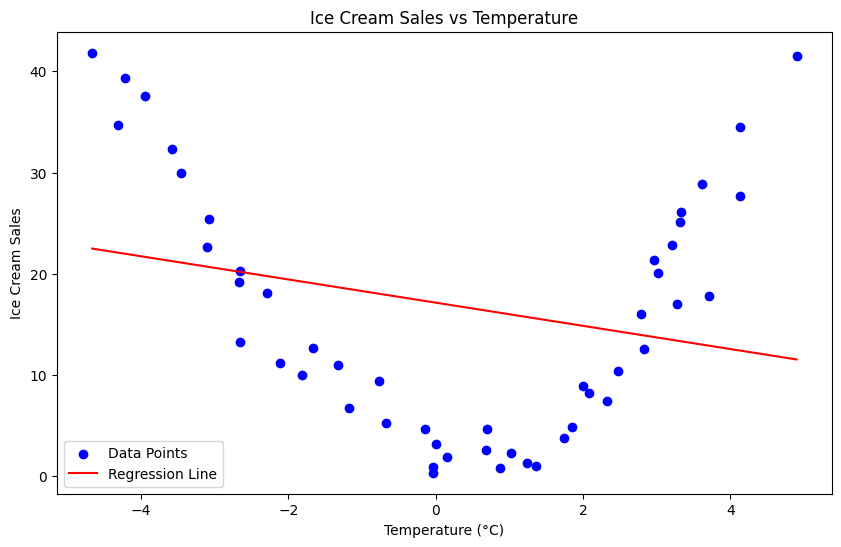

Model parameters (theta): Intercept = 16.82762191206374, Coefficient = -3.061389685276656


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def extract_texts_from_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    return lines

def ice_cream_selling(data):
    # Convert the list of rows into a pandas DataFrame
    data = [line.strip().split(',') for line in data]  # Split each line into a list
    df = pd.DataFrame(data[1:], columns=data[0])  # Use the first row as column headers

    # Extract the relevant columns (Temperature and Sales)
    df = df[['Temperature (°C)', 'Ice Cream Sales (units)']].dropna()  # Drop any missing values

    # Convert columns to appropriate types
    df['Temperature (°C)'] = pd.to_numeric(df['Temperature (°C)'], errors='coerce')
    df['Ice Cream Sales (units)'] = pd.to_numeric(df['Ice Cream Sales (units)'], errors='coerce')

    # Split data into features (X) and target (y)
    X = df[['Temperature (°C)']]  # Feature: Temperature
    y = df['Ice Cream Sales (units)']  # Target: Ice Cream Sales

    # Optionally, standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Initialize and train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Visualize the results
    plt.figure(figsize=(10,6))
    plt.scatter(X, y, color='blue', label='Data Points')  # Scatter plot of data points
    plt.plot(X, model.predict(X_scaled), color='red', label='Regression Line')  # Regression line
    plt.title('Ice Cream Sales vs Temperature')
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Ice Cream Sales')
    plt.legend()
    plt.show()

    # Return the model parameters (intercept and coefficient)
    return [model.intercept_, model.coef_[0]]  # [Intercept, Coefficient]

# Example usage
data = extract_texts_from_file('resources/ice_cream_selling_data.csv')  # Update path as necessary
theta = ice_cream_selling(data)
print(f"Model parameters (theta): Intercept = {theta[0]}, Coefficient = {theta[1]}")


## Electric Power Consumption

Process file `powerconsumption.csv`. Build a model, that would predict electricity consumption from the weather: temperature, humidity and wind speed. Visualize model on a plot.

Choose regression model that would best fit the data. Choose the library for model implementation (sklearn, other library, custom implementation).

Cleaned Columns in DataFrame: Index(['Datetime', 'Temperature', 'Humidity', 'WindSpeed',
       'GeneralDiffuseFlows', 'DiffuseFlows', 'PowerConsumption_Zone1',
       'PowerConsumption_Zone2', 'PowerConsumption_Zone3'],
      dtype='object')


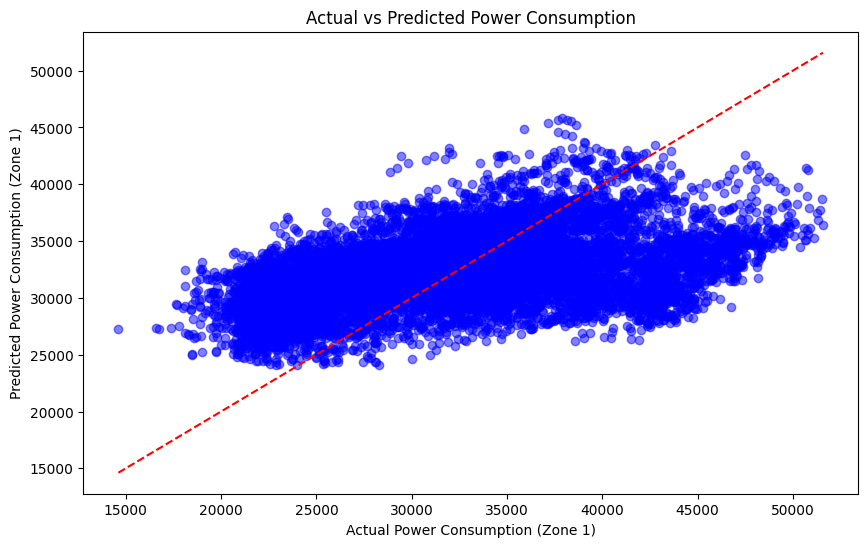

Model parameters (theta): Intercept = 32329.71045412039, Coefficients = [array([2956.27162379, -727.88891656, -291.44111563])]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def extract_texts_from_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    return lines

def power_consumption(data):
    # Convert the list of rows into a pandas DataFrame
    data = [line.strip().split(',') for line in data]  # Split each line into a list
    df = pd.DataFrame(data[1:], columns=data[0])  # Use the first row as column headers
    
    # Clean the column names by stripping extra spaces and quotes
    df.columns = df.columns.str.replace('"', '').str.strip()
    
    # Check the column names after cleaning
    print("Cleaned Columns in DataFrame:", df.columns)
    
    # Extract the relevant columns (Temperature, Humidity, WindSpeed, and PowerConsumption_Zone1)
    try:
        df = df[['Temperature', 'Humidity', 'WindSpeed', 'PowerConsumption_Zone1']].dropna()  # Drop any missing values
    except KeyError as e:
        print(f"KeyError: {e}. Please check the column names in the dataset.")
        return
    
    # Convert columns to appropriate types
    df['Temperature'] = pd.to_numeric(df['Temperature'], errors='coerce')
    df['Humidity'] = pd.to_numeric(df['Humidity'], errors='coerce')
    df['WindSpeed'] = pd.to_numeric(df['WindSpeed'], errors='coerce')
    df['PowerConsumption_Zone1'] = pd.to_numeric(df['PowerConsumption_Zone1'], errors='coerce')

    # Features (X) and Target (y)
    X = df[['Temperature', 'Humidity', 'WindSpeed']]  # Features
    y = df['PowerConsumption_Zone1']  # Target

    # Optionally, standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Initialize and train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Visualize the results (scatter plot + regression line)
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, model.predict(X_test), color='blue', alpha=0.5)  # Scatter plot of actual vs predicted values
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line of perfect fit
    plt.title('Actual vs Predicted Power Consumption')
    plt.xlabel('Actual Power Consumption (Zone 1)')
    plt.ylabel('Predicted Power Consumption (Zone 1)')
    plt.show()

    # Return the model parameters (intercept and coefficients)
    return [model.intercept_, model.coef_]  # [Intercept, Coefficients for Temperature, Humidity, WindSpeed]

# Example usage
data = extract_texts_from_file('resources/powerconsumption.csv')  # Update path as necessary
theta = power_consumption(data)
if theta:
    print(f"Model parameters (theta): Intercept = {theta[0]}, Coefficients = {theta[1:]}")


## Heart Conditions Predictions

Process file `heart.csv`. It has the following data:

- age - Age of the patient
- sex - Sex of the patient
- cp - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic
- trtbps - Resting blood pressure (in mm Hg)
- chol - Cholestoral in mg/dl fetched via BMI sensor
- fbs - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False
- restecg - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy
- thalachh - Maximum heart rate achieved
- oldpeak - Previous peak
- slp - Slope
- caa - Number of major vessels
- thall - Thalium Stress Test result ~ (0,3)
- exng - Exercise induced angina ~ 1 = Yes, 0 = No
- output - Target variable - risk of heart attack - 1 is high chance of heart attack and 0 is low chance.

Use classification model (choose model best fitting model yourself). Choose parameters that would best fit for making a prediction on. Visualize model on a plot.

*Bonus points*: split data into train data and validation data. Validate your model.

Model Accuracy: 85.25%

Confusion Matrix:
[[25  4]
 [ 5 27]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



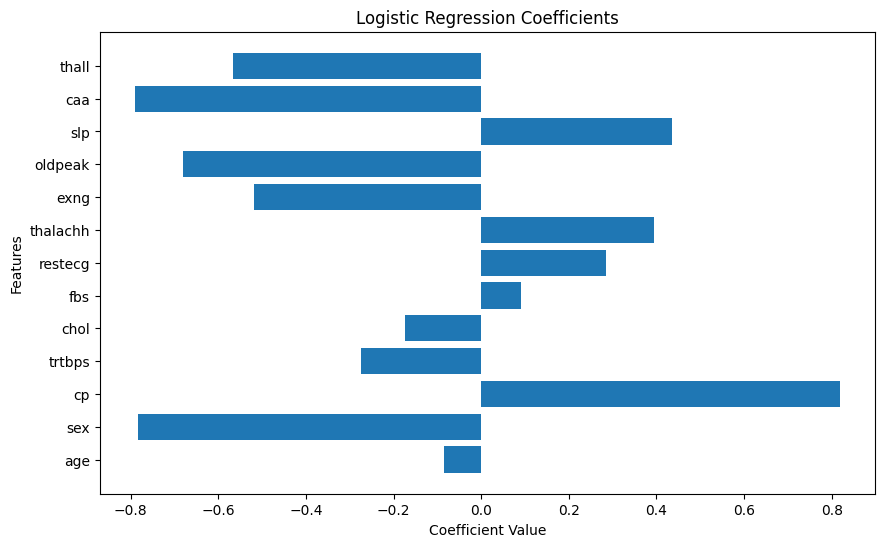

Model parameters (theta): Intercept = [0.178937], Coefficients = [[-0.08559141 -0.78308552  0.81790363 -0.27330685 -0.17484121  0.09031166
   0.28417893  0.39513087 -0.51758388 -0.68139635  0.43530168 -0.78995525
  -0.56565853]]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

def extract_texts_from_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    return lines

def heart_classification(data):
    # Convert the list of rows into a pandas DataFrame
    data = [line.strip().split(',') for line in data]  # Split each line into a list
    df = pd.DataFrame(data[1:], columns=data[0])  # Use the first row as column headers
    
    # Clean the column names by stripping extra spaces and quotes
    df.columns = df.columns.str.replace('"', '').str.strip()

    # Convert appropriate columns to numeric values, if needed
    df = df.apply(pd.to_numeric, errors='coerce')  # Convert all columns to numeric, invalid values will be NaN
    
    # Check for missing values
    if df.isnull().sum().any():
        df = df.dropna()  # Drop rows with any missing values

    # Features (X) and Target (y)
    X = df.drop('output', axis=1)  # Drop the target column (output)
    y = df['output']  # The target variable

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Standardize the features (this is especially important for models like Logistic Regression)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train a Logistic Regression model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_scaled, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy: {accuracy * 100:.2f}%")
    
    # Print confusion matrix and classification report
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Visualize the coefficients (weights) of the logistic regression model
    plt.figure(figsize=(10, 6))
    plt.barh(X.columns, model.coef_[0])
    plt.title("Logistic Regression Coefficients")
    plt.xlabel("Coefficient Value")
    plt.ylabel("Features")
    plt.show()

    # Return the model parameters (intercept and coefficients)
    return [model.intercept_, model.coef_]

# Example usage
data = extract_texts_from_file('resources/heart.csv')  # Update path as necessary
theta = heart_classification(data)
if theta:
    print(f"Model parameters (theta): Intercept = {theta[0]}, Coefficients = {theta[1]}")


## Additional (extra credit)

There are more files in the `resources` folder. Take a look at the. Visualize data in these files. Choose ML algorithm for building a model and making predictions for new data. Visualize the model.